In [2]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d

# Custom Util Tools
from DataPlug import DataPlug as dp
from SqueezeNet import SqueezeNet as sq

# Plotting tools
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jackk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import os

os.makedirs('../data/visualizations', exist_ok=True)

In [4]:
squeeze = sq("SqueezeNet")
dataPlug = dp("DataPlug")

In [5]:
# If you want to load the mergedDF from a csv file
dataPlug.mergedDF = pd.read_csv('../data/mergedDF.csv')
dataPlug.mergedDF = dataPlug.mergedDF.drop('Unnamed: 0', axis=1)
dataPlug.uneditedDF = dataPlug.mergedDF
# Drop unused column info

dataPlug.mergedDF = dataPlug.mergedDF.drop('Open', axis=1)
dataPlug.mergedDF = dataPlug.mergedDF.drop('Low', axis=1)

dataPlug.mergedDF = dataPlug.mergedDF.drop('Adj Close', axis=1)
dataPlug.mergedDF = dataPlug.mergedDF.drop('title', axis=1)

# Might need to keep this, not sure yet
timestamp_info = dataPlug.mergedDF['timestamp']
dataPlug.mergedDF = dataPlug.mergedDF.drop('timestamp', axis=1)

#Add a new column in mergedDF that shows the price change daily
dataPlug.uneditedDF['Price_Change'] = dataPlug.uneditedDF['Close'] - dataPlug.uneditedDF['Open']


In [6]:
print('dataPlug.uneditedDF')
display(dataPlug.uneditedDF)
print('dataPlug.mergedDF')
display(dataPlug.mergedDF)

dataPlug.uneditedDF


,timestamp,Open,High,Low,Close,Adj Close,Volume,title,score,num_comments,Positive_Sentiment,Negative_Sentiment,Neutral_Sentiment,Compound_Sentiment,Price_Change
0,2012-04-11,5.330000,5.380000,5.2350,5.3175,3.603972,19562000,Earnings season is here. Place your bets.,13.000000,22.000000,0.000000,0.000000,1.000000,0.000000,-0.012500
1,2012-04-12,5.325000,5.427500,5.3125,5.3900,3.653110,8414800,"GOOG - beat estimates, price barely rises.",2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.065000
2,2012-04-17,5.455000,5.550000,5.4500,5.5375,3.753081,16022400,Anyone betting on VVUS and their potential app...,6.500000,10.500000,0.102500,0.000000,0.897500,0.238350,0.082500
3,2012-04-19,5.562500,5.635000,5.5325,5.5725,3.776802,14128400,"EBAY posts higher 1Q net income and revenue, s...",7.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.010000
4,2012-04-20,5.607500,5.677500,5.5525,5.5950,3.792051,12587200,"After HGSI spikes 97%, will share price drop a...",4.000000,0.000000,0.165000,0.158000,0.677000,0.025800,-0.012500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,2021-02-08,18.102501,18.165001,14.5050,15.0000,15.000000,102749200,"I have $200 bucks, where can I yolo||SNDL 🚀||$...",1.113846,4.526374,0.152009,0.044976,0.800815,0.150271,-3.102501
2156,2021-02-09,14.152500,14.250000,11.6300,12.5775,12.577500,107372400,Cindicator Capital Wants to Hire r/WallStreetB...,1.000714,17.286530,0.141212,0.050631,0.807442,0.130000,-1.575000
2157,2021-02-10,12.692500,15.707500,11.6375,12.8000,12.800000,145820000,Weed to the moon.||Halo Collective $HCANF||HMN...,6.080738,12.311236,0.150552,0.038095,0.808944,0.163170,0.107500
2158,2021-02-11,12.502500,13.830000,12.0550,12.7750,12.775000,52226800,SNDL to the MOON 🚀🚀🚀🚀🚀🚀||DRAFT KING SHORTYS MU...,1.887141,19.164354,0.147041,0.043510,0.807590,0.145756,0.272500


dataPlug.mergedDF


,High,Close,Volume,score,num_comments,Positive_Sentiment,Negative_Sentiment,Neutral_Sentiment,Compound_Sentiment
0,5.380000,5.3175,19562000,13.000000,22.000000,0.000000,0.000000,1.000000,0.000000
1,5.427500,5.3900,8414800,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
2,5.550000,5.5375,16022400,6.500000,10.500000,0.102500,0.000000,0.897500,0.238350
3,5.635000,5.5725,14128400,7.000000,4.000000,0.000000,0.000000,1.000000,0.000000
4,5.677500,5.5950,12587200,4.000000,0.000000,0.165000,0.158000,0.677000,0.025800
...,...,...,...,...,...,...,...,...,...
2155,18.165001,15.0000,102749200,1.113846,4.526374,0.152009,0.044976,0.800815,0.150271
2156,14.250000,12.5775,107372400,1.000714,17.286530,0.141212,0.050631,0.807442,0.130000
2157,15.707500,12.8000,145820000,6.080738,12.311236,0.150552,0.038095,0.808944,0.163170
2158,13.830000,12.7750,52226800,1.887141,19.164354,0.147041,0.043510,0.807590,0.145756


In [7]:
all_posts_with_sentiment = pd.read_csv("../data/all_posts_with_sentiment.csv")
print(all_posts_with_sentiment)

         Unnamed: 0                                              title  \
0                 0                          Whats going on with PLTR?   
1                 1  Need explanations on Level 2 data for GME, why...   
2                 2       XRT is being used as a laundry short machine   
3                 3                                          Airlines?   
4                 4                                         Buy TRXC 🚀   
...             ...                                                ...   
1118858     1118858  EBAY posts higher 1Q net income and revenue, s...   
1118859     1118859  Anyone betting on VVUS and their potential app...   
1118860     1118860  My poorly timed opening position for AAPL earn...   
1118861     1118861         GOOG - beat estimates, price barely rises.   
1118862     1118862         Earnings season is here.  Place your bets.   

         Positive_Sentiment  Neutral_Sentiment  Negative_Sentiment  \
0                     0.000              

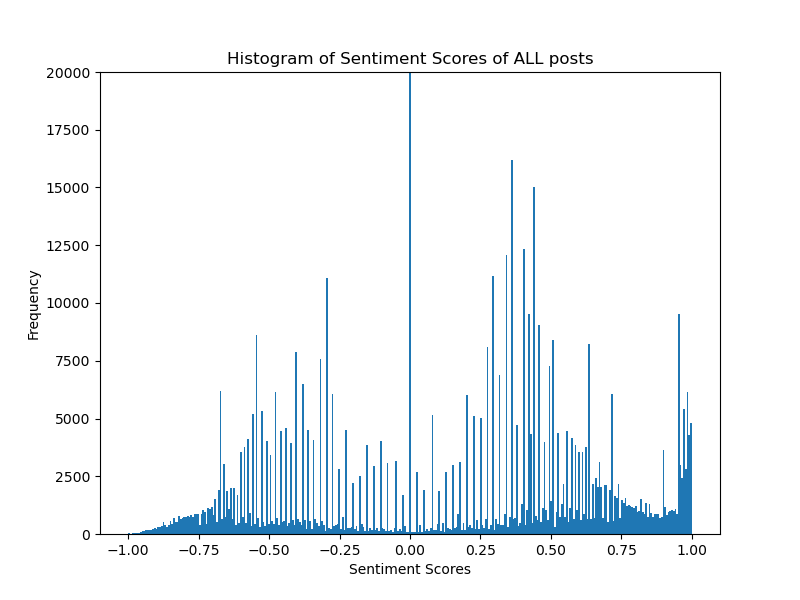

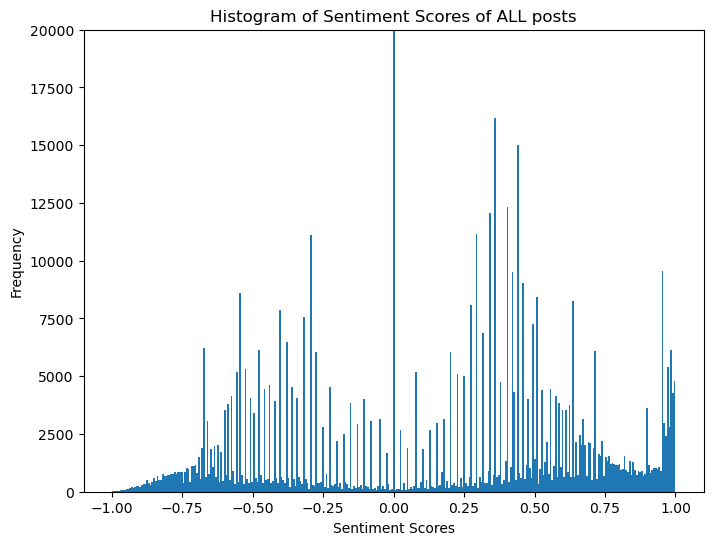

In [8]:
#Historgram of compound sentiment scores of ALL the posts
plt.figure(figsize = (8,6))
plt.hist(x = all_posts_with_sentiment['Compound_Sentiment'], bins = 'auto')
plt.title("Histogram of Sentiment Scores of ALL posts")
plt.xlabel("Sentiment Scores")
plt.ylim(0, 20000)
plt.ylabel("Frequency")
filename = 'Histogram of Sentiment Scores of ALL posts'.replace(' ', '_') + '.png'
plt.savefig(f'../data/visualizations/{filename}')

# show a png file as image
from IPython.display import Image
Image(f'../data/visualizations/{filename}')

In [9]:
print(dataPlug.mergedDF.columns)

Index(['High', 'Close', 'Volume', 'score', 'num_comments',
       'Positive_Sentiment', 'Negative_Sentiment', 'Neutral_Sentiment',
       'Compound_Sentiment'],
      dtype='object')


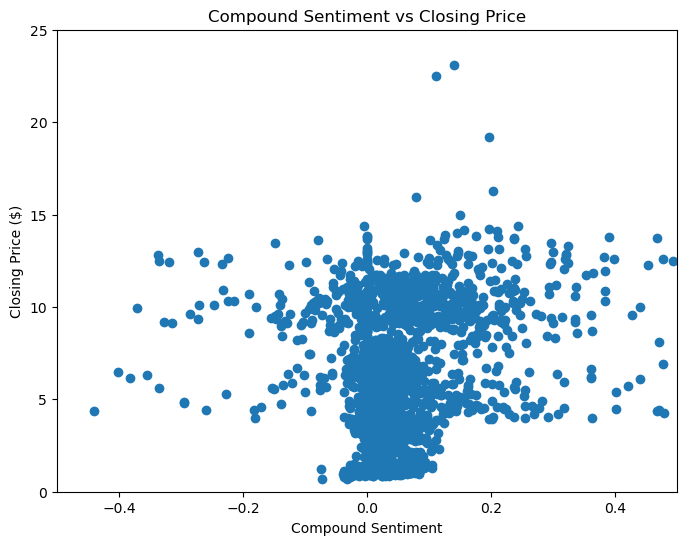

In [10]:
plt.figure(figsize = (8,6))
plt.scatter(x = dataPlug.mergedDF['Compound_Sentiment'], y = dataPlug.mergedDF['Close'] )
plt.xlabel("Compound Sentiment")
plt.ylabel("Closing Price ($)")
plt.title("Compound Sentiment vs Closing Price")
plt.ylim(0,25)
plt.xlim(-0.5, 0.5)
filename = "Compound Sentiment vs Closing Price".replace(' ', '_') + '.png'
plt.savefig(f'../data/visualizations/{filename}')

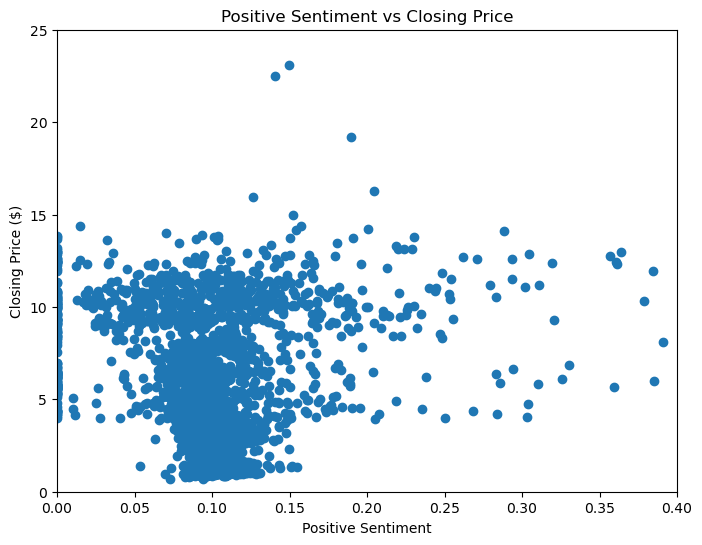

In [11]:
plt.figure(figsize = (8,6))
plt.scatter(x = dataPlug.mergedDF['Positive_Sentiment'], y = dataPlug.mergedDF['Close'] )
plt.xlabel("Positive Sentiment")
plt.ylabel("Closing Price ($)")
plt.title("Positive Sentiment vs Closing Price")
plt.ylim(0,25)
plt.xlim(0,0.4)
filename = "Positive Sentiment vs Closing Price".replace(' ', '_') + '.png'
plt.savefig(f'../data/visualizations/{filename}')

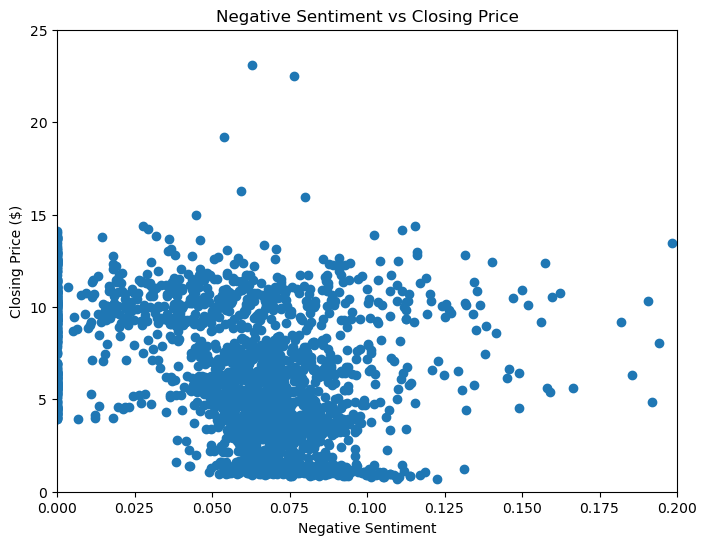

In [12]:
plt.figure(figsize = (8,6))
plt.scatter(x = dataPlug.mergedDF['Negative_Sentiment'], y = dataPlug.mergedDF['Close'] )
plt.xlabel("Negative Sentiment")
plt.ylabel("Closing Price ($)")
plt.title("Negative Sentiment vs Closing Price")
plt.ylim(0,25)
plt.xlim(0,0.2)
filename = "Negative Sentiment vs Closing Price".replace(' ', '_') + '.png'
plt.savefig(f'../data/visualizations/{filename}')

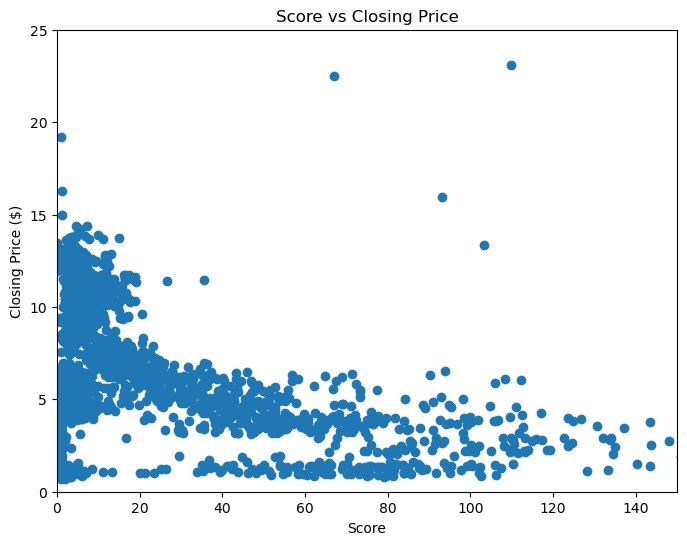

In [13]:
plt.figure(figsize = (8,6))
plt.scatter(x = dataPlug.mergedDF['score'], y = dataPlug.mergedDF['Close'] )
plt.xlabel("Score")
plt.ylabel("Closing Price ($)")
plt.title("Score vs Closing Price")
plt.ylim(0,25)
plt.xlim(0,150)
filename = "Score vs Closing Price".replace(' ', '_') + '.png'
plt.savefig(f'../data/visualizations/{filename}')

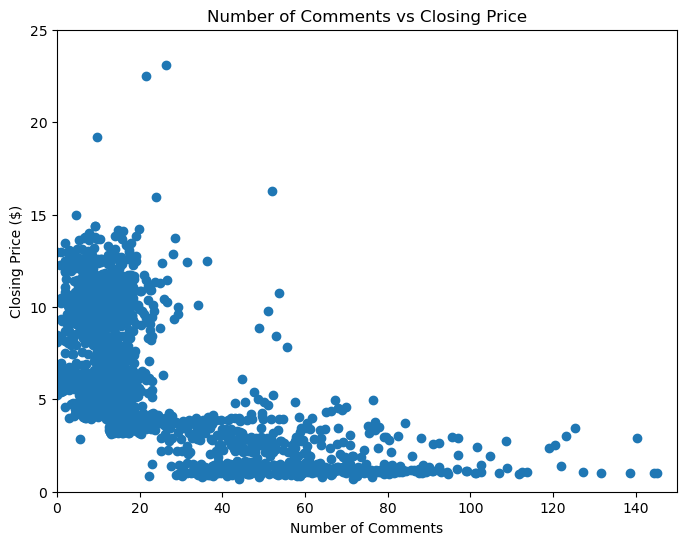

In [14]:
plt.figure(figsize = (8,6))
plt.scatter(x = dataPlug.mergedDF['num_comments'], y = dataPlug.mergedDF['Close'] )
plt.xlabel("Number of Comments")
plt.ylabel("Closing Price ($)")
plt.title("Number of Comments vs Closing Price")
plt.xlim(0,150)
plt.ylim(0,25)
filename = "Number of Comments vs Closing Price".replace(' ', '_') + '.png'
plt.savefig(f'../data/visualizations/{filename}')

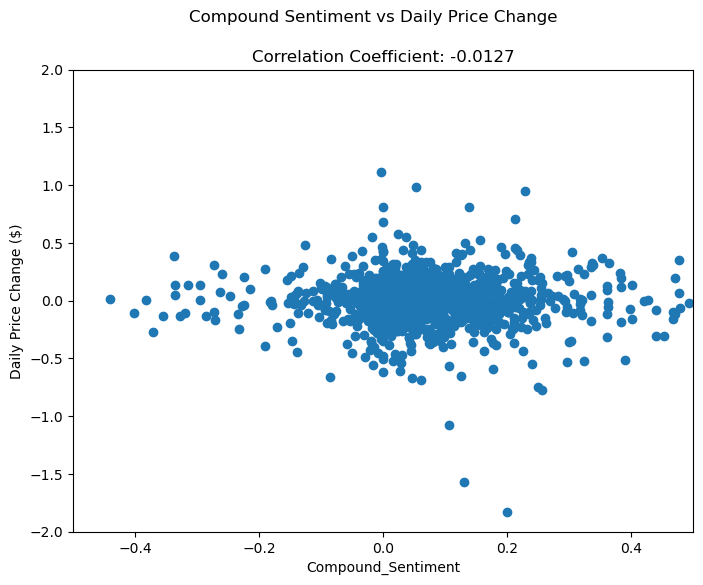

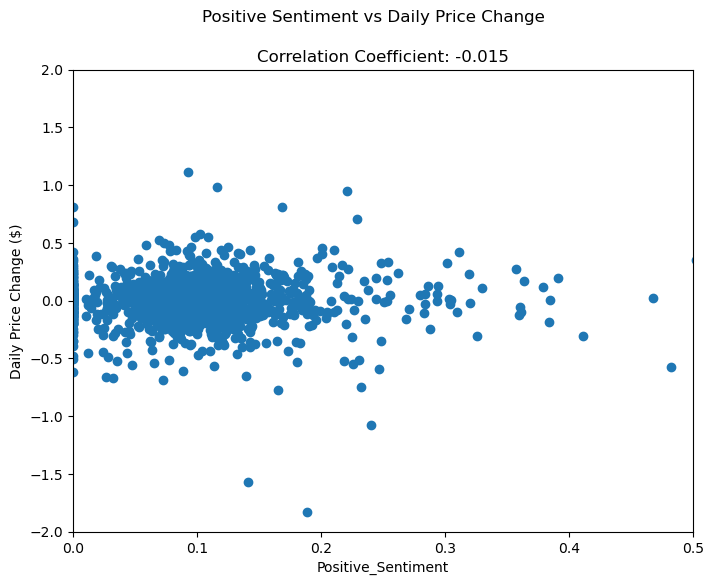

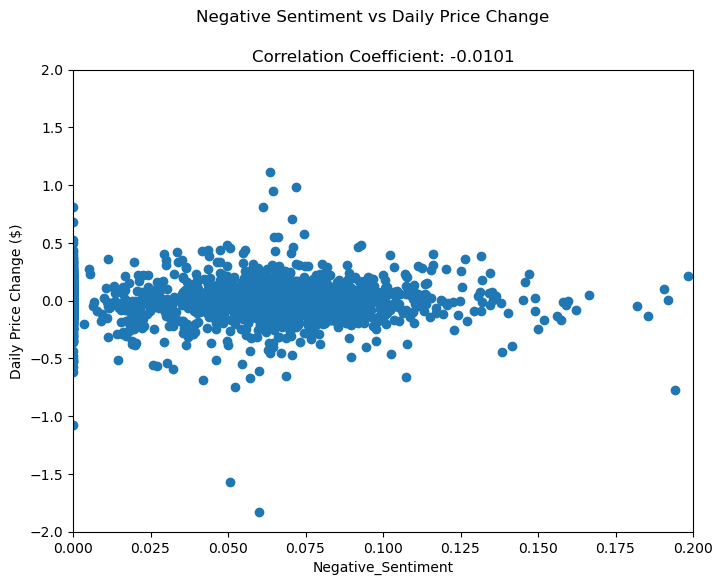

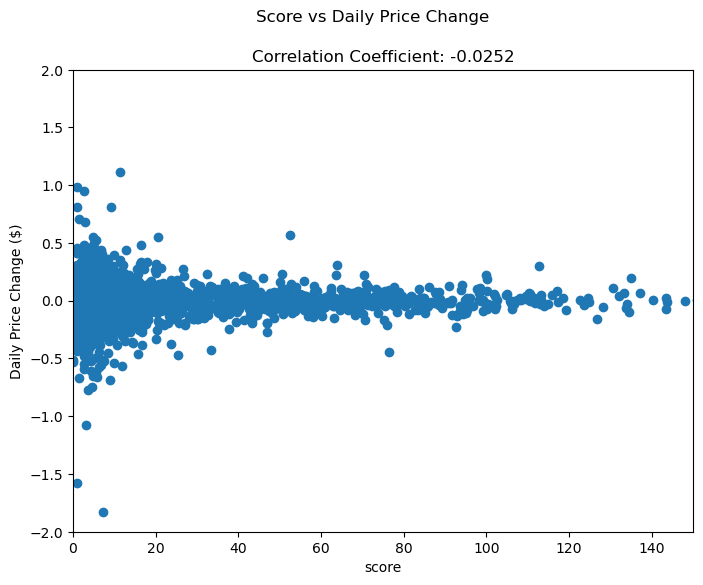

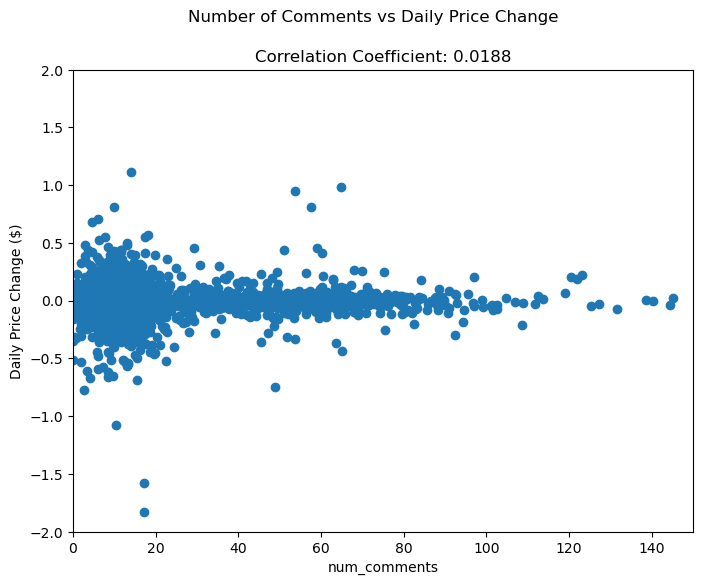

In [20]:
feature_list = ['Compound_Sentiment', 'Positive_Sentiment', 'Negative_Sentiment', 'score', 'num_comments']
limits = {
    'score': [0,150],
    'num_comments': [0,150],
    'Positive_Sentiment': [0,0.5],
    'Negative_Sentiment': [0,0.2],
    'Compound_Sentiment': [-0.5,0.5],
}

for feature in feature_list:
    plt.figure(figsize = (8,6))
    plt.scatter(x = dataPlug.mergedDF[feature], y = dataPlug.uneditedDF['Price_Change'])
    plt.xlabel(feature)
    plt.ylabel("Daily Price Change ($)")
    plt.ylim(-2,2)
    plt.xlim(limits[feature])
    corr = np.corrcoef(dataPlug.mergedDF[feature], dataPlug.uneditedDF['Price_Change'])[0,1]

    if feature == 'score':
        feature = 'Score'
    elif feature == 'num_comments':
        feature = 'Number of Comments'

    title = f"{feature.replace('_', ' ')} vs Daily Price Change"
    suptit = plt.suptitle(title)
    suptit.FontSize = 12
    tit = plt.title(f'Correlation Coefficient: {round(corr, 4)}')
    tit.FontSize = 8
    filename = title.replace(' ', '_') + '.png'
    plt.savefig(f'../data/visualizations/{filename}')

In [21]:
# convert timestamp column to datetime type
dataPlug.uneditedDF['timestamp'] = pd.to_datetime(dataPlug.uneditedDF['timestamp'])

# set a date to filter by
filter_date = pd.to_datetime('2020-07-01')

# filter the DataFrame to show only rows with timestamps after the filter date
filtered_df = dataPlug.uneditedDF[dataPlug.uneditedDF['timestamp'] > filter_date]

print(filtered_df)

      timestamp       Open       High      Low    Close  Adj Close     Volume  \
2004 2020-07-02   1.122500   1.127500   1.0725   1.0725     1.0725    7550400   
2005 2020-07-06   1.077500   1.085000   1.0475   1.0600     1.0600    8563600   
2006 2020-07-07   1.050000   1.062500   1.0150   1.0225     1.0225    9826400   
2007 2020-07-08   1.025000   1.072500   1.0075   1.0650     1.0650    8211200   
2008 2020-07-09   1.067500   1.080000   1.0325   1.0525     1.0525    7970400   
...         ...        ...        ...      ...      ...        ...        ...   
2155 2021-02-08  18.102501  18.165001  14.5050  15.0000    15.0000  102749200   
2156 2021-02-09  14.152500  14.250000  11.6300  12.5775    12.5775  107372400   
2157 2021-02-10  12.692500  15.707500  11.6375  12.8000    12.8000  145820000   
2158 2021-02-11  12.502500  13.830000  12.0550  12.7750    12.7750   52226800   
2159 2021-02-12  12.687500  13.810000  12.0125  13.1000    13.1000   58293200   

                           

Correlation Coefficient: -0.03366613035242967
Correlation Coefficient: 0.0070852636335026736
Correlation Coefficient: -0.02580523186632964
Correlation Coefficient: -0.2628896078289164
Correlation Coefficient: 0.213357509367211


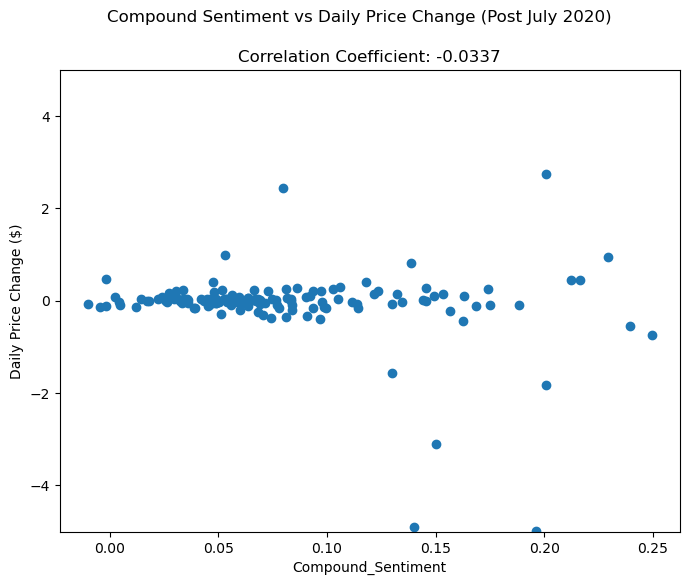

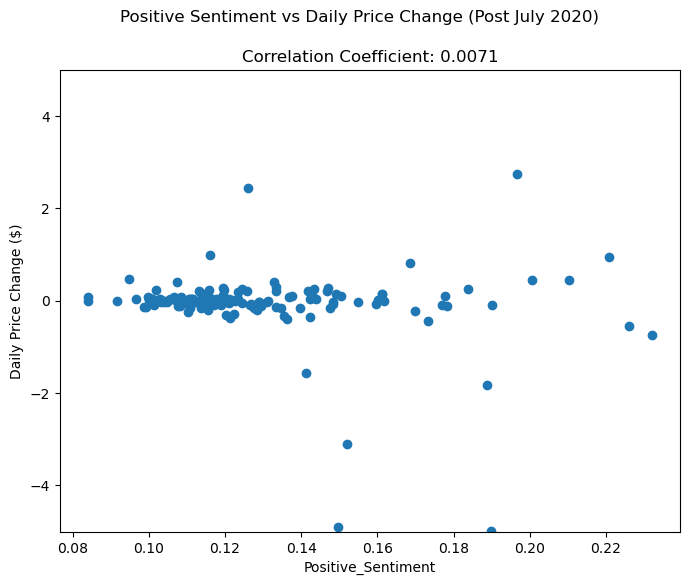

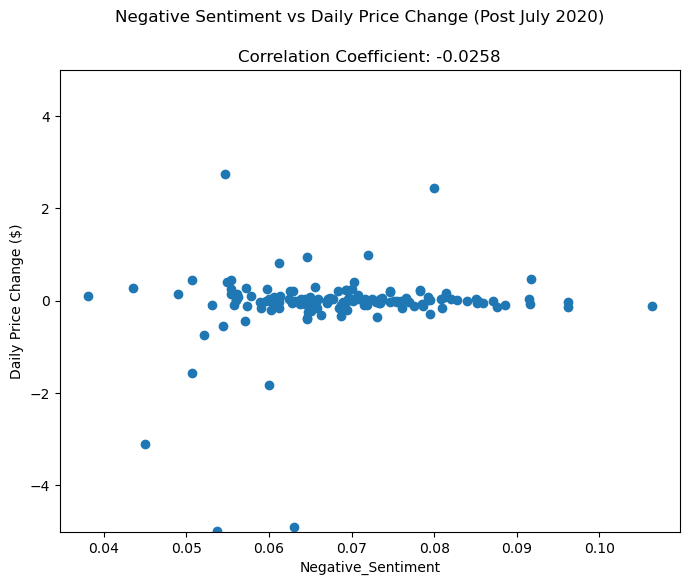

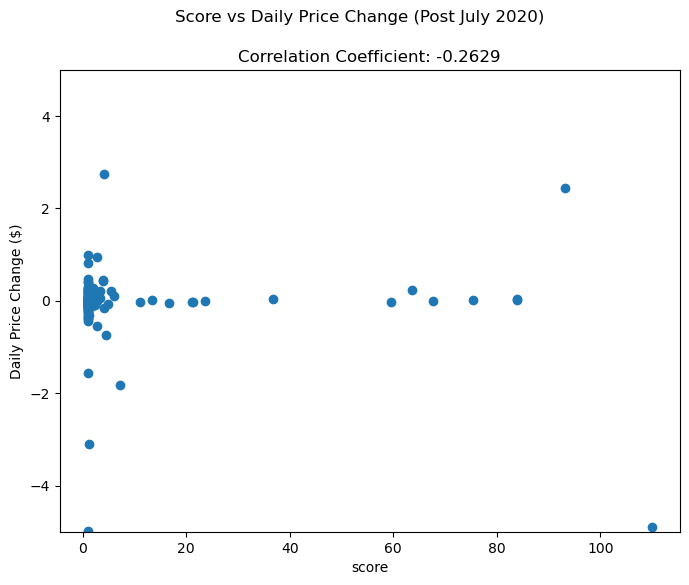

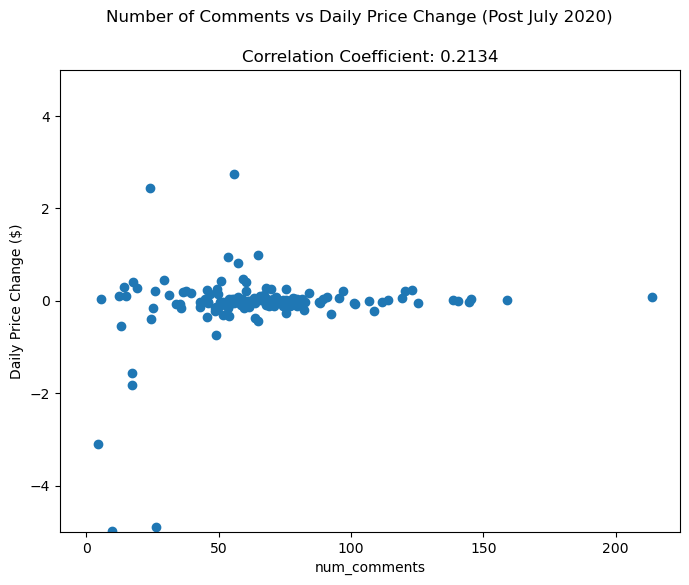

In [23]:
feature_list = ['Compound_Sentiment', 'Positive_Sentiment', 'Negative_Sentiment', 'score', 'num_comments']
'''
limits = {
    'score': [0,150],
    'num_comments': [0,150],
    'Positive_Sentiment': [0,0.5],
    'Negative_Sentiment': [0,0.2],
    'Compound_Sentiment': [-0.4,0.6],
}
'''

for feature in feature_list:
    plt.figure(figsize = (8,6))
    plt.scatter(x = filtered_df[feature], y = filtered_df['Price_Change'])
    plt.xlabel(feature)
    plt.ylabel("Daily Price Change ($)")

    plt.ylim(-5,5)
    #plt.xlim(limits[feature])

    corr = np.corrcoef(filtered_df[feature], filtered_df['Price_Change'])[0,1]
    print(f'Correlation Coefficient: {corr}')

    if feature == 'score':
        feature = 'Score'
    elif feature == 'num_comments':
        feature = 'Number of Comments'

    title = f"{feature.replace('_',' ')} vs Daily Price Change (Post July 2020)"

    suptit = plt.suptitle(title)
    suptit.FontSize = 12
    tit = plt.title(f'Correlation Coefficient: {round(corr, 4)}')
    tit.FontSize = 8
    filename = title.replace(' ', '_') + '.png'
    plt.savefig(f'../data/visualizations/{filename}')

C:\Users\jackk\AppData\Local\Temp\ipykernel_12428\3925464730.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(filtered_df['num_comments'], filtered_df['Compound_Sentiment'], filtered_df['Price_Change'], cmap='Blues')


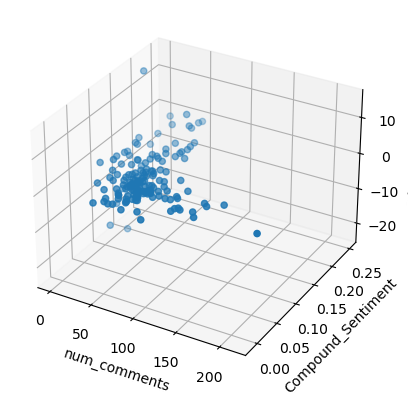

In [24]:
#3D visualization
# Create a 3D scatter plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(filtered_df['num_comments'], filtered_df['Compound_Sentiment'], filtered_df['Price_Change'], cmap='Blues')
ax.set_xlabel('num_comments')
ax.set_ylabel('Compound_Sentiment')
ax.set_zlabel('Price_change')

# Project the scatter plot onto the xy-plane
#ax.view_init(elev=90, azim=-90) # set the view to top-down
#ax.set_zlim3d([-0.1, 1.1]) # hide the z-axis
plt.show()

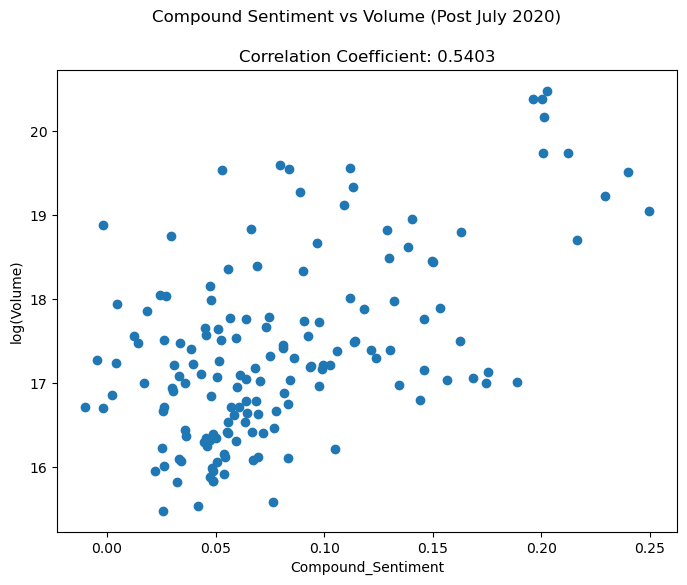

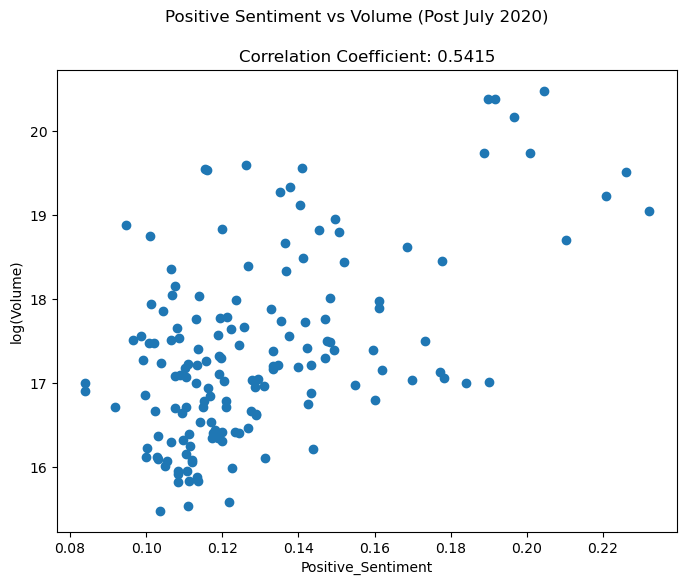

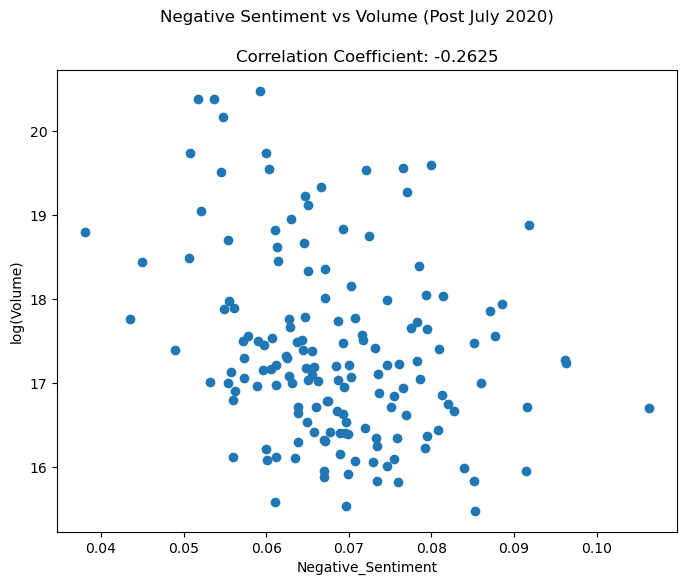

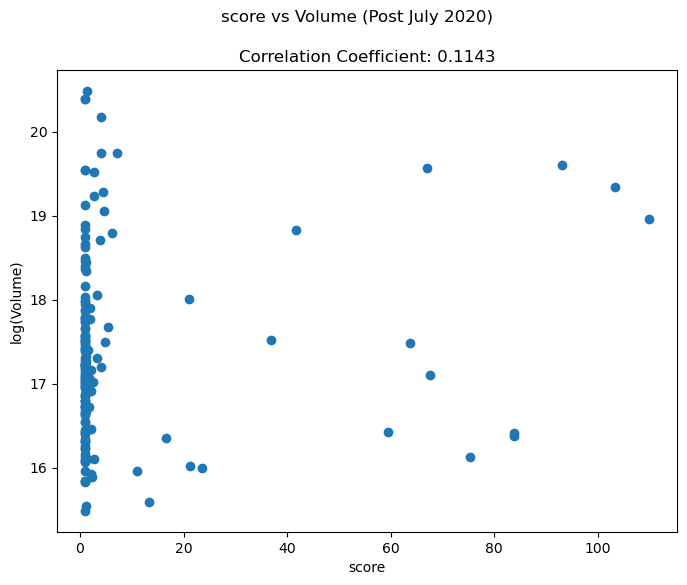

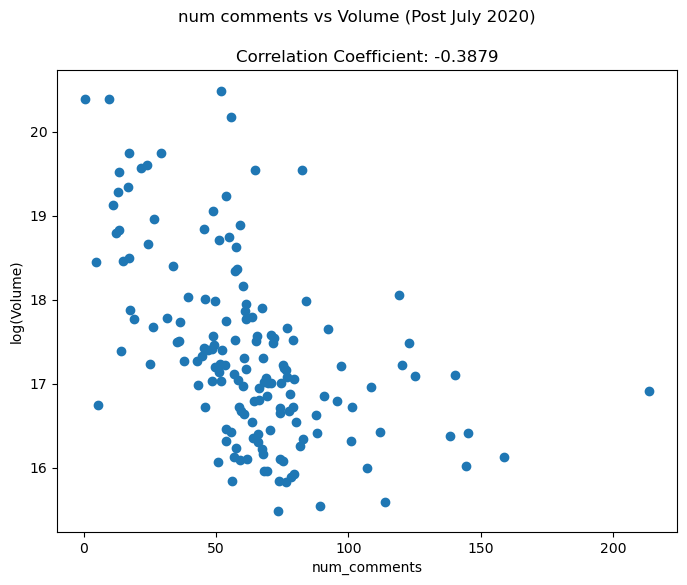

In [26]:
feature_list = ['Compound_Sentiment', 'Positive_Sentiment', 'Negative_Sentiment', 'score', 'num_comments']
'''
limits = {
    'score': [0,150],
    'num_comments': [0,150],
    'Positive_Sentiment': [0,0.5],
    'Negative_Sentiment': [0,0.2],
    'Compound_Sentiment': [-0.4,0.6],
}
'''

for feature in feature_list:
    plt.figure(figsize = (8,6))
    plt.scatter(x = filtered_df[feature], y = np.log(filtered_df['Volume']))
    plt.xlabel(feature)
    plt.ylabel("log(Volume)")
    corr = np.corrcoef(filtered_df[feature], filtered_df['Price_Change'])[0,1]

    title = f"{feature.replace('_',' ')} vs Volume (Post July 2020)"
    #plt.ylim(-5,5)
    #plt.xlim(limits[feature])

    if feature == 'score':
        feature = 'Score'
    elif feature == 'num_comments':
        feature = 'Number of Comments'

    suptit = plt.suptitle(title)
    suptit.FontSize = 12
    tit = plt.title(f'Correlation Coefficient: {round(corr, 4)}')
    tit.FontSize = 8
    filename = title.replace(' ', '_') + '.png'
    plt.savefig(f'../data/visualizations/{filename}')
